In [1]:
%pylab inline
import pyemma

Populating the interactive namespace from numpy and matplotlib


/home/ppxasjsm/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ppxasjsm/miniconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


## D configurations

### pH4

In [112]:
pdb_ph4 = '../D/gaff2/pH4/prod/prod_no_water.pdb'
trajs_ph4 = ['../D/gaff2/pH4/prod/traj_001_no_water.dcd', '../D/gaff2/pH4/prod/traj_002_no_water.dcd']
feat_ph4 = pyemma.coordinates.featurizer(pdb_ph4)
feat_ph4.add_minrmsd_to_ref(trajs_ph4[0], ref_frame=0)
data_ph4 = pyemma.coordinates.load(trajs_ph4, features = feat_ph4)

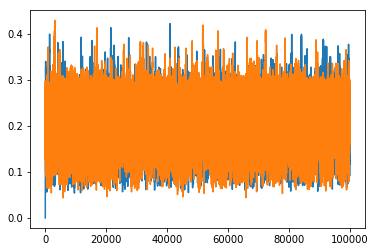

In [113]:
plt.plot(data_ph4[0])
plt.plot(data_ph4[1])

In [114]:
cluster_kmeans_ph4 = pyemma.coordinates.cluster_kmeans(data_ph4, k=10, stride=1, max_iter=100)

In [115]:
cluster_kmeans_ph4.dtrajs

[array([7, 9, 4, ..., 3, 6, 6], dtype=int32),
 array([7, 4, 2, ..., 0, 0, 5], dtype=int32)]

In [116]:
its = pyemma.msm.its(cluster_kmeans_ph4.dtrajs, lags=[1, 2, 3, 5, 7, 10,20], nits=4, errors='bayes')

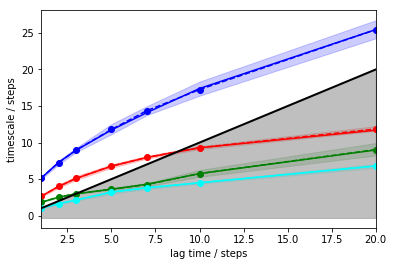

In [117]:
pyemma.plots.plot_implied_timescales(its, ylog=False);

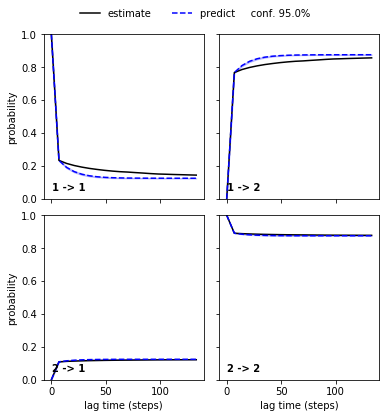

In [119]:

msm = pyemma.msm.bayesian_markov_model(cluster_kmeans_ph4.dtrajs, lag=7.5)
pyemma.plots.plot_cktest(msm.cktest(2, mlags=20));



In [37]:
msm.pi

array([0.03382391, 0.13250164, 0.09372374, 0.14908416, 0.14068372,
       0.02907844, 0.16310242, 0.07398287, 0.04515874, 0.13886038])

In [38]:
samples = msm.sample_by_state(20)

              

In [41]:
count=0
for s in samples:
    
    pyemma.coordinates.save_traj(trajs_ph4, s, outfile='D/pH4/RMSD_Cluster_'+str(count)+'.pdb', top=pdb_ph4)
    count+=1

12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_0.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_1.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_2.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_3.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_4.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_5.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_6.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_7.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_8.pdb
12-03-20 11:32:16 pyemma.coordinates.api INFO     Created file D/pH4/RMSD_Cluster_9.pdb


In [35]:
samples

array([array([[    0, 46194],
       [    0,   832],
       [    0, 34595],
       [    0, 53734],
       [    0,  3192],
       [    0, 74421],
       [    0, 81834],
       [    0, 30935],
       [    0, 81847],
       [    0, 41208],
       [    0,  2335],
       [    0, 99390],
       [    0, 62668],
       [    0, 14422],
       [    0, 87540],
       [    0, 86874],
       [    0, 95063],
       [    0, 34118],
       [    0, 63511],
       [    0, 31037]]),
       array([[    0, 22508],
       [    0, 48034],
       [    0, 42048],
       [    0, 50670],
       [    0, 80856],
       [    0, 62092],
       [    0, 16137],
       [    0, 47516],
       [    0, 63562],
       [    0, 16556],
       [    0, 37131],
       [    0, 78252],
       [    0, 17050],
       [    0, 86338],
       [    0, 16226],
       [    0, 22591],
       [    0, 59583],
       [    0, 71729],
       [    0, 73355],
       [    0, 42322]]),
       array([[    0, 15173],
       [    0, 20545],
       [ 

### pH5

In [41]:
pdb_ph5 = '../D/gaff2/P_group_charge/prod/ade_D_ala_no_water.pdb'
trajs_ph5 = ['../D/gaff2/P_group_charge/prod/trajectory001_no_water.dcd', '../D/gaff2/P_group_charge/prod/trajectory002_no_water.dcd']
feat_ph5 = pyemma.coordinates.featurizer(pdb_ph5)
feat_ph5.add_minrmsd_to_ref(trajs_ph5[0], ref_frame=0)
data_ph5 = pyemma.coordinates.load(trajs_ph5, features = feat_ph5)

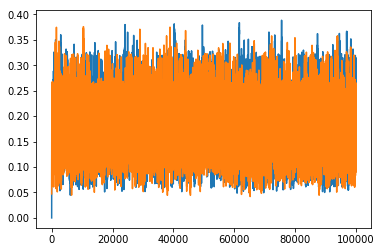

In [42]:
plt.plot(data_ph5[0])
plt.plot(data_ph5[1])

In [43]:
cluster_kmeans_ph5 = pyemma.coordinates.cluster_kmeans(data_ph5, k=10, stride=1, max_iter=100)

In [46]:
its = pyemma.msm.its(cluster_kmeans_ph5.dtrajs, lags=[1, 2, 3, 5, 7, 10, 20, 30, 40, 50], nits=4, errors='bayes')

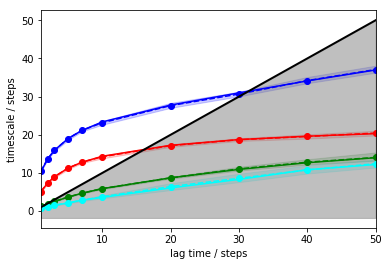

In [47]:
pyemma.plots.plot_implied_timescales(its, ylog=False);

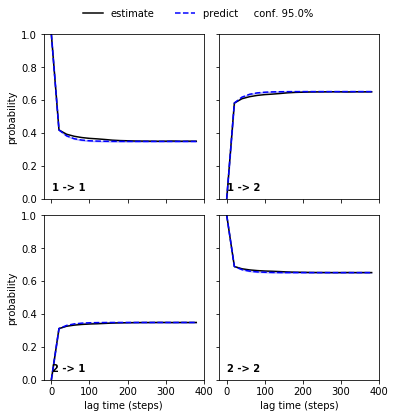

In [48]:
msm = pyemma.msm.bayesian_markov_model(cluster_kmeans_ph5.dtrajs, lag=20)
pyemma.plots.plot_cktest(msm.cktest(2, mlags=20));

In [49]:
samples = msm.sample_by_state(20)

In [50]:
count=0
for s in samples:
    
    pyemma.coordinates.save_traj(trajs_ph5, s, outfile='D/pH5/RMSD_Cluster_'+str(count)+'.pdb', top=pdb_ph5)
    count+=1

12-03-20 16:53:01 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_0.pdb
12-03-20 16:53:01 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_1.pdb
12-03-20 16:53:01 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_2.pdb
12-03-20 16:53:01 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_3.pdb
12-03-20 16:53:01 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_4.pdb
12-03-20 16:53:02 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_5.pdb
12-03-20 16:53:02 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_6.pdb
12-03-20 16:53:02 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_7.pdb
12-03-20 16:53:02 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_8.pdb
12-03-20 16:53:02 pyemma.coordinates.api INFO     Created file D/pH5/RMSD_Cluster_9.pdb


## L-configurations

### pH4

In [50]:
pdb_ph4_L = '../L/gaff2/pH4//prod/ade_L_ala_no_water.pdb'
trajs_ph4_L = ['../L/gaff2/pH4/prod/traj_001_no_water.dcd', '../L/gaff2/pH4/prod/traj_002_no_water.dcd']
feat_ph4_L = pyemma.coordinates.featurizer(pdb_ph4_L)
feat_ph4_L.add_minrmsd_to_ref(trajs_ph4_L[0], ref_frame=0)
data_ph4_L = pyemma.coordinates.load(trajs_ph4_L, features = feat_ph4_L)

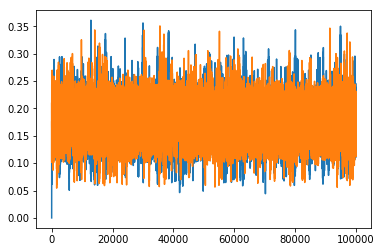

In [51]:
plt.plot(data_ph4_L[0])
plt.plot(data_ph4_L[1])

In [52]:
cluster_kmeans_ph4_L = pyemma.coordinates.cluster_kmeans(data_ph4_L, k=10, stride=1, max_iter=100)

In [59]:
its = pyemma.msm.its(cluster_kmeans_ph4_L.dtrajs, lags=[1, 2, 3, 5, 7, 10,15,20,25], nits=4, errors='bayes')

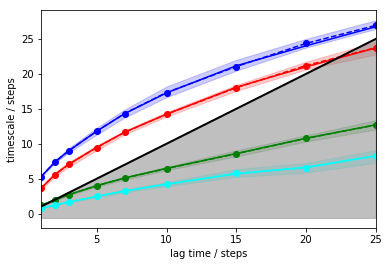

In [60]:
pyemma.plots.plot_implied_timescales(its, ylog=False);

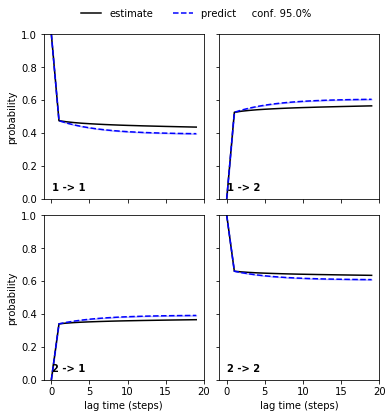

In [61]:
msm = pyemma.msm.bayesian_markov_model(cluster_kmeans_ph4_L.dtrajs, lag=1)
pyemma.plots.plot_cktest(msm.cktest(2, mlags=20));

In [62]:
samples = msm.sample_by_state(20)

In [63]:
count=0
for s in samples:
    
    pyemma.coordinates.save_traj(trajs_ph4_L, s, outfile='L/pH4/RMSD_Cluster_'+str(count)+'.pdb', top=pdb_ph4_L)
    count+=1

12-03-20 11:49:30 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_0.pdb
12-03-20 11:49:30 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_1.pdb
12-03-20 11:49:30 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_2.pdb
12-03-20 11:49:30 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_3.pdb
12-03-20 11:49:30 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_4.pdb
12-03-20 11:49:30 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_5.pdb
12-03-20 11:49:30 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_6.pdb
12-03-20 11:49:31 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_7.pdb
12-03-20 11:49:31 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_8.pdb
12-03-20 11:49:31 pyemma.coordinates.api INFO     Created file L/pH4/RMSD_Cluster_9.pdb


### pH5

In [19]:
pdb_ph5_L = '../L/gaff2/pH5//prod/ade_L_ala_no_water.pdb'
trajs_ph5_L = ['../L/gaff2/pH5/prod/traj_001_no_water.dcd', '../L/gaff2/pH5/prod/traj_002_no_water.dcd']
feat_ph5_L = pyemma.coordinates.featurizer(pdb_ph5_L)
feat_ph5_L.add_minrmsd_to_ref(trajs_ph5_L[0], ref_frame=0)
data_ph5_L = pyemma.coordinates.load(trajs_ph5_L, features = feat_ph5_L)

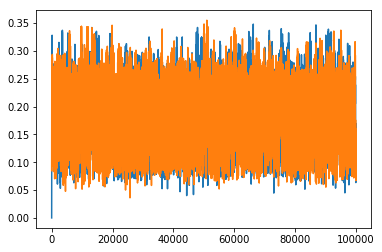

In [20]:
plt.plot(data_ph5_L[0])
plt.plot(data_ph5_L[1])

In [22]:
cluster_kmeans_ph5_L = pyemma.coordinates.cluster_kmeans(data_ph5_L, k=10, stride=1, max_iter=100)

In [35]:
its = pyemma.msm.its(cluster_kmeans_ph5_L.dtrajs, lags=[1, 2, 3, 5, 7, 10, 15, 20, 30, 40, 50, 60], nits=4, errors='bayes')

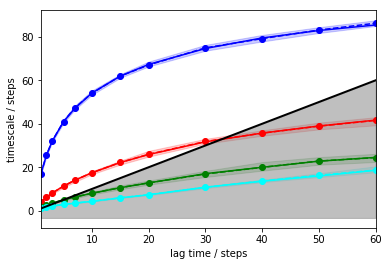

In [36]:
pyemma.plots.plot_implied_timescales(its, ylog=False);

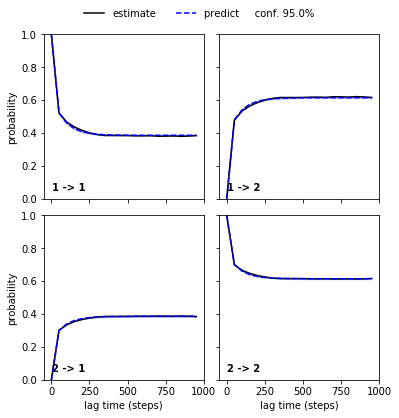

In [37]:
msm = pyemma.msm.bayesian_markov_model(cluster_kmeans_ph5_L.dtrajs, lag=50)
pyemma.plots.plot_cktest(msm.cktest(2, mlags=20));

In [38]:
msm.pi

array([0.15299921, 0.15211251, 0.07463212, 0.08826282, 0.12205819,
       0.13542393, 0.13285165, 0.01682437, 0.06697989, 0.05785531])

In [39]:
samples = msm.sample_by_state(20)

In [40]:
count=0
for s in samples:
    
    pyemma.coordinates.save_traj(trajs_ph5_L, s, outfile='L/pH5/RMSD_Cluster_'+str(count)+'.pdb', top=pdb_ph5_L)
    count+=1

12-03-20 16:45:11 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_0.pdb
12-03-20 16:45:11 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_1.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_2.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_3.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_4.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_5.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_6.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_7.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_8.pdb
12-03-20 16:45:12 pyemma.coordinates.api INFO     Created file L/pH5/RMSD_Cluster_9.pdb


## Average structures

In [120]:
import Bio.PDB

parser = Bio.PDB.PDBParser(QUIET=True)  # Don't show me warnings
structure = parser.get_structure('cluster0', 'L/pH5/RMSD_Cluster_0.pdb') 

In [121]:
atoms = [a.parent.parent.id + '-' + str(a.parent.id[1]) + '-' +  a.name for a in structure[0].get_atoms() if a.parent.id[0] == ' ']  # obtained from model '0

In [126]:
atom_avgs = {}
atomcount = 0
modelcount = 0
for atom in atoms:
    atom_avgs[atom] = []
    atomcount+=1
    for model in structure:
        atom_ = atom.split('-')
        coor = model[atom_[0]][int(atom_[1])][atom_[2]].coord
        atom_avgs[atom].append(coor)
        modelcount+=1
    print(modelcount)
    modelcount = 0
    atom_avgs[atom] = sum(atom_avgs[atom]) / len(atom_avgs[atom])

print(atomcount)

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
51


In [110]:
atom_avgs

{'A-1-C': [array([26.959,  3.244, 21.699], dtype=float32),
  array([12.677, 14.041, 19.726], dtype=float32),
  array([12.663, 12.902, 26.347], dtype=float32),
  array([22.533, 16.456, 13.885], dtype=float32),
  array([31.348,  9.78 , 19.761], dtype=float32),
  array([20.506,  2.909, 13.412], dtype=float32),
  array([34.2  , 26.781, 29.268], dtype=float32),
  array([25.652,  4.155, 25.074], dtype=float32),
  array([ 9.855, 12.177,  8.736], dtype=float32),
  array([26.247, 34.612, 12.988], dtype=float32),
  array([26.122, 23.343, 26.859], dtype=float32),
  array([28.209,  5.027,  9.608], dtype=float32),
  array([22.824, 34.801, 14.506], dtype=float32),
  array([23.932, 11.3  , 20.943], dtype=float32),
  array([18.476, 25.05 , 20.502], dtype=float32),
  array([ 7.343, 15.802, 23.156], dtype=float32),
  array([ 6.868, 33.856, 29.08 ], dtype=float32),
  array([-1.183, 28.776, 20.245], dtype=float32),
  array([24.989, 19.425, 26.142], dtype=float32),
  array([26.101, 11.376, 15.457], dtype=f

In [100]:
ns = Bio.PDB.StructureBuilder.Structure('id=cluster0')  #  new structure
ns.add(structure[0])  # add model 0
for atom in ns[0].get_atoms():
    chain = atom.parent.parent
    res = atom.parent
    if res.id[0] != ' ':
        chain.detach_child(res)  # detach hetres
    else:
        coor = atom_avgs[chain.id + '-' + str(res.id[1]) + '-' + atom.name]
        atom.coord = coor
        print(coor)

[array([26.959,  3.244, 21.699], dtype=float32), array([12.677, 14.041, 19.726], dtype=float32), array([12.663, 12.902, 26.347], dtype=float32), array([22.533, 16.456, 13.885], dtype=float32), array([31.348,  9.78 , 19.761], dtype=float32), array([20.506,  2.909, 13.412], dtype=float32), array([34.2  , 26.781, 29.268], dtype=float32), array([25.652,  4.155, 25.074], dtype=float32), array([ 9.855, 12.177,  8.736], dtype=float32), array([26.247, 34.612, 12.988], dtype=float32), array([26.122, 23.343, 26.859], dtype=float32), array([28.209,  5.027,  9.608], dtype=float32), array([22.824, 34.801, 14.506], dtype=float32), array([23.932, 11.3  , 20.943], dtype=float32), array([18.476, 25.05 , 20.502], dtype=float32), array([ 7.343, 15.802, 23.156], dtype=float32), array([ 6.868, 33.856, 29.08 ], dtype=float32), array([-1.183, 28.776, 20.245], dtype=float32), array([24.989, 19.425, 26.142], dtype=float32), array([26.101, 11.376, 15.457], dtype=float32)]
[array([25.943,  3.278, 22.905], dtype=

In [101]:
io = Bio.PDB.PDBIO()
io.set_structure(ns)
io.save('new_Clust0.pdb')

ValueError: too many values to unpack (expected 3)

In [86]:
ns.get_atoms()

<generator object Structure.get_atoms at 0x7f5540b9a888>